In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
% matplotlib inline
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["savefig.bbox"] = 'tight'

In [2]:
from sklearn.datasets import load_iris
from sklearn.utils import shuffle
iris = load_iris()

In [3]:
X, y = iris.data, iris.target
X, y = shuffle(X, y)

In [4]:
print(X[:30])

[[ 7.9  3.8  6.4  2. ]
 [ 5.4  3.7  1.5  0.2]
 [ 6.2  2.2  4.5  1.5]
 [ 5.4  3.9  1.3  0.4]
 [ 7.7  3.8  6.7  2.2]
 [ 4.9  3.1  1.5  0.1]
 [ 7.7  3.   6.1  2.3]
 [ 6.4  3.2  4.5  1.5]
 [ 4.7  3.2  1.6  0.2]
 [ 5.   3.4  1.6  0.4]
 [ 5.7  2.8  4.1  1.3]
 [ 5.1  3.5  1.4  0.2]
 [ 5.4  3.   4.5  1.5]
 [ 5.2  4.1  1.5  0.1]
 [ 5.2  2.7  3.9  1.4]
 [ 6.9  3.1  5.1  2.3]
 [ 4.6  3.6  1.   0.2]
 [ 6.8  3.   5.5  2.1]
 [ 7.4  2.8  6.1  1.9]
 [ 6.2  2.8  4.8  1.8]
 [ 4.9  2.4  3.3  1. ]
 [ 5.   3.4  1.5  0.2]
 [ 7.7  2.8  6.7  2. ]
 [ 4.4  3.   1.3  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 6.3  3.3  4.7  1.6]
 [ 6.9  3.1  5.4  2.1]
 [ 5.7  3.8  1.7  0.3]
 [ 5.1  3.8  1.5  0.3]
 [ 6.4  2.8  5.6  2.1]]


In [5]:
# a column is mostly missing
rng = np.random.RandomState(0)
X_missing_column = X.copy()
mask = X.sum(axis=1) < rng.normal(loc=19, scale=3, size=X.shape[0])
X_missing_column[mask, 0] = np.NaN
X_missing_column[120:]

array([[ nan,  2.8,  5.1,  1.5],
       [ nan,  3. ,  4.4,  1.4],
       [ nan,  3.2,  6. ,  1.8],
       [ nan,  2.9,  1.4,  0.2],
       [ nan,  2.7,  3.9,  1.2],
       [ nan,  3.4,  1.7,  0.2],
       [ nan,  3. ,  1.6,  0.2],
       [ nan,  3. ,  4.2,  1.2],
       [ nan,  3. ,  5.5,  1.8],
       [ nan,  3.1,  1.6,  0.2],
       [ nan,  2.3,  4. ,  1.3],
       [ nan,  2.5,  5. ,  1.9],
       [ nan,  3.4,  1.6,  0.2],
       [ nan,  4. ,  1.2,  0.2],
       [ nan,  3. ,  1.4,  0.1],
       [ nan,  3.6,  6.1,  2.5],
       [ nan,  3.9,  1.7,  0.4],
       [ nan,  3.1,  5.6,  2.4],
       [ nan,  2.7,  5.3,  1.9],
       [ nan,  3.4,  4.5,  1.6],
       [ 6.5,  3. ,  5.2,  2. ],
       [ nan,  2.5,  4.5,  1.7],
       [ nan,  3. ,  5.8,  1.6],
       [ nan,  3.4,  1.5,  0.4],
       [ nan,  3.2,  5.1,  2. ],
       [ nan,  2.9,  4.3,  1.3],
       [ nan,  2.8,  4.9,  2. ],
       [ nan,  3.2,  5.3,  2.3],
       [ nan,  2.4,  3.8,  1.1],
       [ nan,  2.8,  5.1,  2.4]])

In [6]:
# only a few rows have missing data. but a lot of it
rng = np.random.RandomState(4)
X_missing_rows = X.copy()
for i in rng.randint(0, 30, 5):
    X_missing_rows[i, rng.uniform(size=4)> .2] = np.NaN
X_missing_rows[:30]

array([[ 7.9,  3.8,  6.4,  2. ],
       [ nan,  nan,  1.5,  0.2],
       [ 6.2,  2.2,  4.5,  1.5],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 7.7,  3.8,  6.7,  2.2],
       [ nan,  nan,  nan,  nan],
       [ 7.7,  3. ,  6.1,  2.3],
       [ 6.4,  3.2,  4.5,  1.5],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.7,  2.8,  4.1,  1.3],
       [ 5.1,  3.5,  1.4,  0.2],
       [ 5.4,  3. ,  4.5,  1.5],
       [ 5.2,  4.1,  1.5,  0.1],
       [ nan,  nan,  nan,  nan],
       [ 6.9,  3.1,  5.1,  2.3],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 6.8,  3. ,  5.5,  2.1],
       [ 7.4,  2.8,  6.1,  1.9],
       [ 6.2,  2.8,  4.8,  1.8],
       [ 4.9,  2.4,  3.3,  1. ],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 7.7,  2.8,  6.7,  2. ],
       [ 4.4,  nan,  nan,  nan],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 6.3,  3.3,  4.7,  1.6],
       [ nan,  nan,  nan,  2.1],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 6.4,  2.8,  5.6,  2.1]])

In [7]:
X[y==2].mean(axis=0)

array([ 6.588,  2.974,  5.552,  2.026])

In [8]:
# some values missing only
rng = np.random.RandomState(0)
X_some_missing = X.copy()
mask = np.abs(X[:, 2] - rng.normal(loc=5.5, scale=.7, size=X.shape[0])) < .6
X_some_missing[mask, 3] = np.NaN
# different random numbers
mask2 = np.abs(X[:, 2] - rng.normal(loc=5.5, scale=.7, size=X.shape[0])) < .6
X_some_missing[mask2, 2] = np.NaN
X_some_missing[:30]

array([[ 7.9,  3.8,  6.4,  nan],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 6.2,  2.2,  nan,  1.5],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 7.7,  3.8,  6.7,  nan],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 7.7,  3. ,  nan,  nan],
       [ 6.4,  3.2,  nan,  1.5],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.7,  2.8,  4.1,  1.3],
       [ 5.1,  3.5,  1.4,  0.2],
       [ 5.4,  3. ,  4.5,  1.5],
       [ 5.2,  4.1,  1.5,  0.1],
       [ 5.2,  2.7,  3.9,  1.4],
       [ 6.9,  3.1,  5.1,  2.3],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 6.8,  3. ,  5.5,  nan],
       [ 7.4,  2.8,  nan,  nan],
       [ 6.2,  2.8,  4.8,  nan],
       [ 4.9,  2.4,  3.3,  nan],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 7.7,  2.8,  6.7,  nan],
       [ 4.4,  3. ,  1.3,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 6.3,  3.3,  4.7,  nan],
       [ 6.9,  3.1,  nan,  nan],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 6.4,  2.8,  nan,  2.1]])

In [9]:
np.mean(mask)

0.26666666666666666

In [10]:
np.bincount(y[~mask2])

array([50, 37, 28])

In [11]:
# from now on use X_ = X_some_missing
X_ = X_some_missing

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X_, y, stratify=y, random_state=0)

In [13]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

nan_columns = np.any(np.isnan(X_train), axis=0)
X_drop_columns = X_train[:, ~nan_columns]
logreg = make_pipeline(StandardScaler(), LogisticRegression())
scores = cross_val_score(logreg, X_drop_columns, y_train, cv=10)
np.mean(scores)

0.81277777777777782

In [14]:
print(X_train[-30:])

[[ 6.3  3.3  4.7  nan]
 [ 6.5  3.   nan  2. ]
 [ 5.1  3.5  1.4  0.3]
 [ 5.4  3.4  1.5  0.4]
 [ 4.8  3.4  1.6  0.2]
 [ 5.1  3.5  1.4  0.2]
 [ 4.6  3.6  1.   0.2]
 [ 5.8  2.7  3.9  1.2]
 [ 5.8  2.7  nan  nan]
 [ 6.4  3.2  5.3  2.3]
 [ 6.2  3.4  5.4  nan]
 [ 5.   3.5  1.3  0.3]
 [ 6.3  2.7  4.9  1.8]
 [ 4.9  3.1  1.5  0.1]
 [ 6.8  3.   5.5  nan]
 [ 5.4  3.4  1.7  0.2]
 [ 6.3  2.3  4.4  1.3]
 [ 5.8  2.6  4.   1.2]
 [ 6.   2.9  nan  1.5]
 [ 6.1  2.8  4.   1.3]
 [ 4.9  3.1  1.5  0.1]
 [ 7.2  3.   5.8  nan]
 [ 7.2  3.2  6.   nan]
 [ 4.8  3.   1.4  0.1]
 [ 6.8  2.8  nan  1.4]
 [ 6.   2.7  5.1  nan]
 [ 5.7  4.4  1.5  0.4]
 [ 6.1  2.6  5.6  1.4]
 [ 6.7  3.1  5.6  nan]
 [ 6.7  3.   nan  2.3]]


In [15]:
np.set_printoptions(precision=3)

In [16]:
from sklearn.preprocessing import Imputer
imp = Imputer(strategy="mean").fit(X_train)
X_mean_imp = imp.transform(X_train)
X_mean_imp[-30:]

array([[ 6.3  ,  3.3  ,  4.7  ,  0.984],
       [ 6.5  ,  3.   ,  3.377,  2.   ],
       [ 5.1  ,  3.5  ,  1.4  ,  0.3  ],
       [ 5.4  ,  3.4  ,  1.5  ,  0.4  ],
       [ 4.8  ,  3.4  ,  1.6  ,  0.2  ],
       [ 5.1  ,  3.5  ,  1.4  ,  0.2  ],
       [ 4.6  ,  3.6  ,  1.   ,  0.2  ],
       [ 5.8  ,  2.7  ,  3.9  ,  1.2  ],
       [ 5.8  ,  2.7  ,  3.377,  0.984],
       [ 6.4  ,  3.2  ,  5.3  ,  2.3  ],
       [ 6.2  ,  3.4  ,  5.4  ,  0.984],
       [ 5.   ,  3.5  ,  1.3  ,  0.3  ],
       [ 6.3  ,  2.7  ,  4.9  ,  1.8  ],
       [ 4.9  ,  3.1  ,  1.5  ,  0.1  ],
       [ 6.8  ,  3.   ,  5.5  ,  0.984],
       [ 5.4  ,  3.4  ,  1.7  ,  0.2  ],
       [ 6.3  ,  2.3  ,  4.4  ,  1.3  ],
       [ 5.8  ,  2.6  ,  4.   ,  1.2  ],
       [ 6.   ,  2.9  ,  3.377,  1.5  ],
       [ 6.1  ,  2.8  ,  4.   ,  1.3  ],
       [ 4.9  ,  3.1  ,  1.5  ,  0.1  ],
       [ 7.2  ,  3.   ,  5.8  ,  0.984],
       [ 7.2  ,  3.2  ,  6.   ,  0.984],
       [ 4.8  ,  3.   ,  1.4  ,  0.1  ],
       [ 6.8  , 

In [17]:
X_mean_imp.shape

(112, 4)

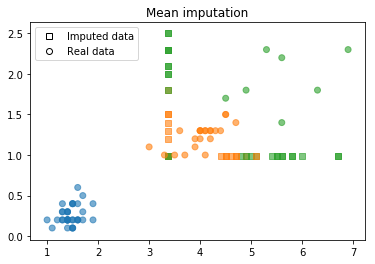

In [18]:
import matplotlib.patches as patches
imputed_mask = np.any(np.isnan(X_train), axis=1)

def plot_imputation(X_imp, title=None, ax=None):
    # helper function to plot imputed data points
    if ax is None:
        ax = plt.gca()
    if title is not None:
        ax.set_title(title)
    ax.scatter(X_imp[imputed_mask, 2], X_imp[imputed_mask, 3], c=plt.cm.Vega10(y_train[imputed_mask]), alpha=.6, marker="s")
    ax.scatter(X_imp[~imputed_mask, 2], X_imp[~imputed_mask, 3], c=plt.cm.Vega10(y_train[~imputed_mask]), alpha=.6)
    # this is for creating the legend...
    square = plt.Line2D((0,), (0,), linestyle='', marker="s", markerfacecolor="w", markeredgecolor="k", label='Imputed data')
    circle = plt.Line2D((0,), (0,), linestyle='', marker="o", markerfacecolor="w", markeredgecolor="k", label='Real data')
    plt.legend(handles=[square, circle], numpoints=1, loc="best")

plot_imputation(X_mean_imp, "Mean imputation")

In [19]:
# I designed the problem so that mean imputation wouldn't work - slightly different than in lecture!

In [20]:
mean_pipe = make_pipeline(Imputer(), StandardScaler(), LogisticRegression())
scores = cross_val_score(mean_pipe, X_train, y_train, cv=10)
np.mean(scores)

0.83944444444444444

# Model-driven imputation and KNN

In [21]:
# Very inefficient didactic implementation

distances = np.zeros((X_train.shape[0], X_train.shape[0]))
for i, x1 in enumerate(X_train):
    for j, x2 in enumerate(X_train):
        dist = (x1 - x2) ** 2
        nan_mask = np.isnan(dist)
        distances[i, j] = dist[~nan_mask].mean() * X_train.shape[1]
        
neighbors = np.argsort(distances, axis=1)[:, 1:]
n_neighbors = 3

X_train_knn = X_train.copy()
for feature in range(X_train.shape[1]):
    has_missing_value = np.isnan(X_train[:, feature])
    for row in np.where(has_missing_value)[0]:
        neighbor_features = X_train[neighbors[row], feature]
        non_nan_neighbors = neighbor_features[~np.isnan(neighbor_features)]
        X_train_knn[row, feature] = non_nan_neighbors[:n_neighbors].mean()

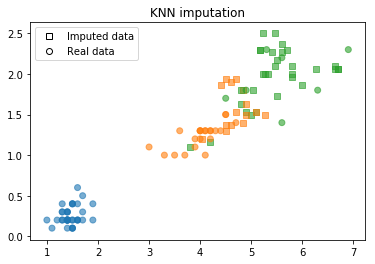

In [22]:
plot_imputation(X_train_knn, "KNN imputation")

In [23]:
# this is cheating because I'm not using a pipeline
# we would need to write a transformer that does the imputation
scores = cross_val_score(logreg, X_train_knn, y_train, cv=10)
np.mean(scores)

0.87444444444444458

In [24]:
asdf = np.arange(5)

In [41]:
from sklearn.ensemble import RandomForestRegressor


# this is just because I'm lazy and don't want to special-case the first iteration
X_imputed = Imputer().fit_transform(X_train)

rf = RandomForestRegressor(n_estimators=100)

for i in range(10):
    last = X_imputed.copy()
    for feature in range(X_train.shape[1]):
        inds_not_f = np.arange(X_train.shape[1])
        inds_not_f = inds_not_f[inds_not_f != feature]
        f_missing = np.isnan(X_train[:, feature])
        if not np.any(f_missing):
            continue
        rf.fit(X_imputed[~f_missing][:, inds_not_f], X_train[~f_missing, feature])

        X_imputed[f_missing, feature] = rf.predict(X_imputed[f_missing][:, inds_not_f])

    # this would make more sense if we scaled the data beforehand
    if (np.linalg.norm(last - X_imputed)) < .5:
        print(i)
        break


4


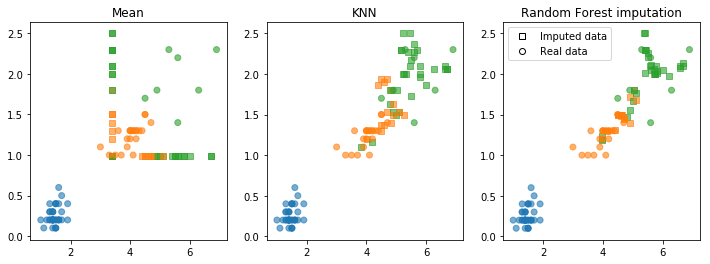

In [42]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
plot_imputation(X_mean_imp, "Mean", ax=axes[0])
plot_imputation(X_train_knn, "KNN", ax=axes[1])
plot_imputation(X_imputed, "Random Forest imputation", ax=axes[2])
plt.savefig("images/mean_knn_rf_comparison.png")

In [43]:
scores = cross_val_score(logreg, X_imputed, y_train, cv=10)
np.mean(scores)

0.85499999999999987

In [28]:
# you need to pip install fancyimpute for the rest! - and tensorflow
import fancyimpute
X_train_fancy_knn = fancyimpute.KNN().complete(X_train)

Using TensorFlow backend.


Imputing row 1/112 with 1 missing, elapsed time: 0.006
Imputing row 101/112 with 1 missing, elapsed time: 0.008


NameError: name 'X_train_knn3' is not defined

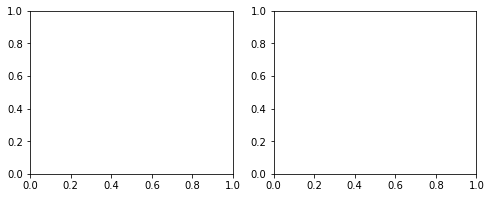

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(8, 3))
plot_imputation(X_train_knn3, "Naive KNN", ax=ax[0])
plot_imputation(X_train_fancy_knn, "Fancy KNN", ax=ax[1])

In [ ]:
X_train_fancy_simple = fancyimpute.SimpleFill().complete(X_train)
X_train_fancy_mice = fancyimpute.MICE(verbose=0).complete(X_train)
X_train_fancy_si = fancyimpute.SoftImpute(verbose=0).complete(X_train)

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8), dpi=100)
for ax, name, X_imp in zip(axes.ravel(), ["mean", "KNN", "MICE", "Soft impute"],
                           [X_train_fancy_simple, X_train_fancy_knn, X_train_fancy_mice, X_train_fancy_si]):
    plot_imputation(X_imp, name, ax=ax)
plt.savefig("images/fancy_impute_comparison.png")

In [ ]:
mice = fancyimpute.MICE(verbose=0)
X_train_fancy_mice = mice.complete(X_train)
scores = cross_val_score(logreg, X_train_fancy_mice, y_train, cv=10)
scores.mean()

# Feature Selection

In [ ]:
from sklearn.datasets import load_boston

In [ ]:
boston = load_boston()
X, y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
from sklearn.preprocessing import scale
X_train_scaled = scale(X_train)
cov = np.cov(X_train_scaled, rowvar=False)

In [ ]:
plt.figure(figsize=(8, 8), dpi=100)
plt.imshow(cov)
plt.xticks(range(X.shape[1]), boston.feature_names)
plt.yticks(range(X.shape[1]), boston.feature_names);

In [ ]:
from scipy.cluster import hierarchy
order = np.array(hierarchy.dendrogram(hierarchy.ward(cov), no_plot=True)['ivl'], dtype="int")

In [ ]:
plt.figure(figsize=(8, 8), dpi=100)
plt.imshow(cov[order, :][:, order])
plt.xticks(range(X.shape[1]), boston.feature_names[order])
plt.yticks(range(X.shape[1]), boston.feature_names[order]);

# Supervised feature selection

In [ ]:
from sklearn.feature_selection import f_regression
f_values, p_values = f_regression(X, y)

In [ ]:
fig, ax = plt.subplots(2, 1)
ax[0].set_title("F values")
ax[0].plot(f_values, 'o')
ax[1].set_title("p values")
ax[1].plot(p_values, 'o')
ax[1].set_yscale("log")

ax[1].set_xticks(range(X.shape[1]))
ax[1].set_xticklabels(boston.feature_names, rotation=50);
fig.tight_layout()

In [ ]:
from sklearn.feature_selection import SelectKBest, SelectPercentile, SelectFpr
from sklearn.linear_model import RidgeCV

select = SelectKBest(k=2, score_func=f_regression)
select.fit(X_train, y_train)
print(X_train.shape)
print(select.transform(X_train).shape)

In [ ]:
all_features = make_pipeline(StandardScaler(), RidgeCV())
select_2 = make_pipeline(StandardScaler(), SelectKBest(k=2, score_func=f_regression), RidgeCV())

In [ ]:
np.mean(cross_val_score(all_features, X_train, y_train, cv=10))

In [ ]:
np.mean(cross_val_score(select_2, X_train, y_train, cv=10))

In [ ]:
from sklearn.feature_selection import mutual_info_regression
scores = mutual_info_regression(X_train, y_train, discrete_features=[3])

fig = plt.figure(figsize=(8, 2))
line_f, = plt.plot(f_values, 'o', c='r')
plt.ylabel("F value")
ax2 = plt.twinx()
line_s, = ax2.plot(scores, 'o', alpha=.7)
ax2.set_ylabel("MI score")
plt.xticks(range(X.shape[1]), boston.feature_names)
plt.legend([line_s, line_f], ["Mutual info scores", "F values"], loc=(0, 1))

In [ ]:
from sklearn.linear_model import LassoCV
X_train_scaled = scale(X_train)
lasso = LassoCV().fit(X_train_scaled, y_train)
print(lasso.coef_)

In [ ]:
fig = plt.figure(figsize=(8, 2))
line_f, = plt.plot(f_values, 'o', c='r')
plt.ylabel("F value")
ax2 = plt.twinx()
ax2.set_ylabel("lasso coefficients")
line_s, = ax2.plot(np.abs(lasso.coef_), 'o', alpha=.7)
plt.xticks(range(X.shape[1]), boston.feature_names)
plt.legend([line_s, line_f], ["Lasso coefficients abs", "F values"], loc=(0, 1))

In [ ]:
from sklearn.linear_model import Lasso
X_train_scaled = scale(X_train)
lasso = Lasso().fit(X_train_scaled, y_train)
print(lasso.coef_)

In [ ]:
fig = plt.figure(figsize=(8, 2))
line_f, = plt.plot(f_values, 'o', c='r')
plt.ylabel("F value")
ax2 = plt.twinx()
ax2.set_ylabel("lasso coefficients")
line_s, = ax2.plot(np.abs(lasso.coef_), 'o', alpha=.7)
plt.xticks(range(X.shape[1]), boston.feature_names)
plt.legend([line_s, line_f], ["Lasso coefficients abs", "F values"], loc=(0, 1))

In [ ]:
from sklearn.feature_selection import SelectFromModel
select_lassocv = SelectFromModel(LassoCV(), threshold="median")
select_lassocv.fit(X_train, y_train)
print(select_lassocv.transform(X_train).shape)

In [ ]:
pipe_lassocv = make_pipeline(StandardScaler(), select_lassocv, RidgeCV())
np.mean(cross_val_score(pipe_lassocv, X_train, y_train, cv=10))

In [ ]:
np.mean(cross_val_score(all_features, X_train, y_train, cv=10))

In [ ]:
# could grid-search alpha in lasso
select_lasso = SelectFromModel(Lasso())
pipe_lasso = make_pipeline(StandardScaler(), select_lasso, RidgeCV())
np.mean(cross_val_score(pipe_lasso, X_train, y_train, cv=10))

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# create ranking among all features by selecting only one
rfe = RFE(LinearRegression(), n_features_to_select=1)
rfe.fit(X_train_scaled, y_train)
rfe.ranking_

In [ ]:
lr = LinearRegression().fit(X_train_scaled, y_train)
fig = plt.figure(figsize=(8, 2))
line_f, = plt.plot(np.abs(lr.coef_), 'o', c='r')
plt.ylabel("LR coefficients abs")
ax2 = plt.twinx()
ax2.set_ylabel("1 - RFE ranking")
line_s, = ax2.plot(1 - rfe.ranking_, 'o', alpha=.7)
plt.xticks(range(X.shape[1]), boston.feature_names)
plt.legend([line_s, line_f], ["RFE ranking", "LR coefficients"], loc=(0, 1))

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV

rfe = RFECV(LinearRegression(), cv=10)
rfe.fit(X_train_scaled, y_train)
print(rfe.support_)
print(boston.feature_names[rfe.support_])

In [ ]:
pipe_rfe_ridgecv = make_pipeline(StandardScaler(), RFECV(LinearRegression(), cv=10), RidgeCV())
np.mean(cross_val_score(pipe_rfe_ridgecv, X_train, y_train, cv=10))

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
pipe_rfe_ridgecv = make_pipeline(StandardScaler(), PolynomialFeatures(), RFECV(LinearRegression(), cv=10), RidgeCV())
np.mean(cross_val_score(pipe_rfe_ridgecv, X_train, y_train, cv=10))

In [ ]:
pipe_rfe_ridgecv.fit(X_train, y_train)
print(pipe_rfe_ridgecv.named_steps['rfecv'].support_)

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector
sfs = SequentialFeatureSelector(LinearRegression(), forward=False, k_features=7)
sfs.fit(X_train_scaled, y_train)

In [ ]:
print(sfs.k_feature_idx_)
print(boston.feature_names[np.array(sfs.k_feature_idx_)])

In [ ]:
sfs.k_score_